In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df=pd.read_csv('Iris.csv')

In [24]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
df['Species'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Species, Length: 150, dtype: bool

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
en=pd.DataFrame(encoder.fit_transform(df[['Species']]).toarray(),columns=encoder.get_feature_names_out())

In [29]:
en

Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica
0                    1.0                      0.0                     0.0
1                    1.0                      0.0                     0.0
2                    1.0                      0.0                     0.0
3                    1.0                      0.0                     0.0
4                    1.0                      0.0                     0.0
..                   ...                      ...                     ...
145                  0.0                      0.0                     1.0
146                  0.0                      0.0                     1.0
147                  0.0                      0.0                     1.0
148                  0.0                      0.0                     1.0
149                  0.0                      0.0                     1.0

[150 rows x 3 columns]

In [30]:
df = pd.concat([df, en], axis=1)

In [31]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                  1.0                      0.0                     0.0  
1                  1.0                      0.0                     0.0  
2                  1.0                      0.0                     0.0  
3                  1.0                      0.0                     0.0  
4                  1.0                      0.0                     0.0

In [32]:
df.drop(['Species'],axis=1,inplace=True)

In [33]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            5.1           3.5            1.4           0.2   
1   2            4.9           3.0            1.4           0.2   
2   3            4.7           3.2            1.3           0.2   
3   4            4.6           3.1            1.5           0.2   
4   5            5.0           3.6            1.4           0.2   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                  1.0                      0.0                     0.0  
1                  1.0                      0.0                     0.0  
2                  1.0                      0.0                     0.0  
3                  1.0                      0.0                     0.0  
4                  1.0                      0.0                     0.0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       150 non-null    int64  
 1   SepalLengthCm            150 non-null    float64
 2   SepalWidthCm             150 non-null    float64
 3   PetalLengthCm            150 non-null    float64
 4   PetalWidthCm             150 non-null    float64
 5   Species_Iris-setosa      150 non-null    float64
 6   Species_Iris-versicolor  150 non-null    float64
 7   Species_Iris-virginica   150 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.5 KB


In [35]:
X = df.drop(df[["Species_Iris-setosa","Species_Iris-versicolor","Species_Iris-virginica"]], axis=1)
y = df[["Species_Iris-setosa","Species_Iris-versicolor","Species_Iris-virginica"]]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
X_train.shape,X_test.shape

((112, 5), (38, 5))

In [38]:
X_train.corr()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.692336     -0.371189       0.881337   
SepalLengthCm  0.692336       1.000000     -0.061632       0.860562   
SepalWidthCm  -0.371189      -0.061632      1.000000      -0.383181   
PetalLengthCm  0.881337       0.860562     -0.383181       1.000000   
PetalWidthCm   0.887193       0.794813     -0.316023       0.960011   

               PetalWidthCm  
Id                 0.887193  
SepalLengthCm      0.794813  
SepalWidthCm      -0.316023  
PetalLengthCm      0.960011  
PetalWidthCm       1.000000

In [39]:
y_train


Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica
4                    1.0                      0.0                     0.0
32                   1.0                      0.0                     0.0
142                  0.0                      0.0                     1.0
85                   0.0                      1.0                     0.0
86                   0.0                      1.0                     0.0
..                   ...                      ...                     ...
71                   0.0                      1.0                     0.0
106                  0.0                      0.0                     1.0
14                   1.0                      0.0                     0.0
92                   0.0                      1.0                     0.0
102                  0.0                      0.0                     1.0

[112 rows x 3 columns]

<Axes: >

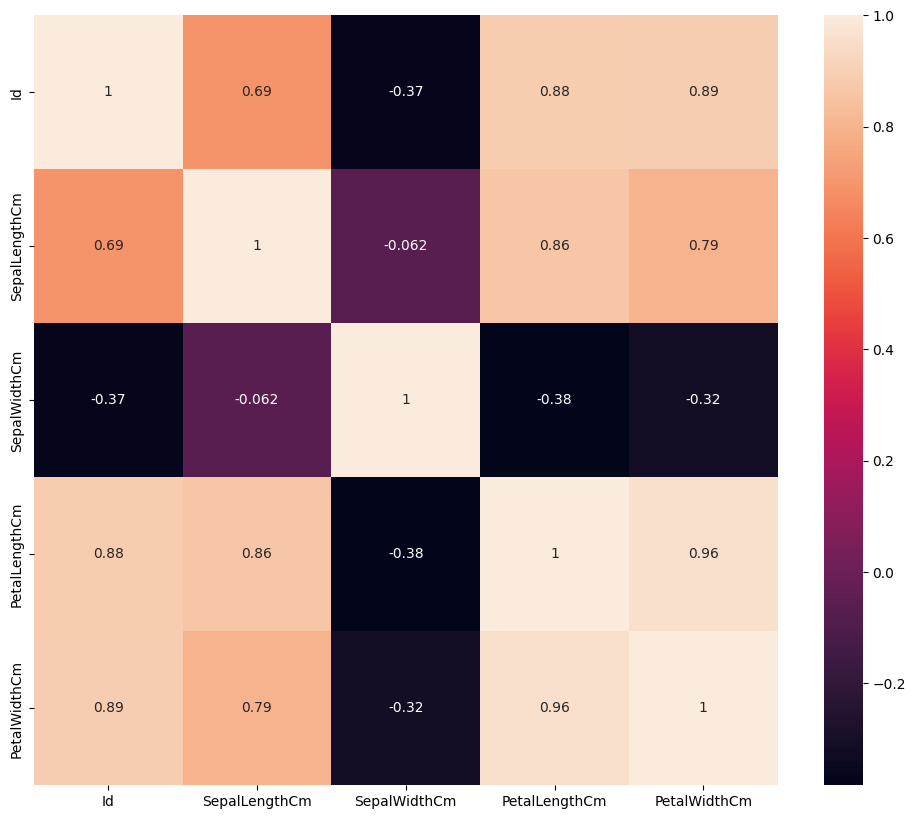

In [40]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [41]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features=correlation(X_train,0.85)

In [43]:
corr_features

{'PetalLengthCm', 'PetalWidthCm'}

In [44]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((112, 3), (38, 3))

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Mean absolute error 0.21907676199193227
R2 Score 0.6516361477498012


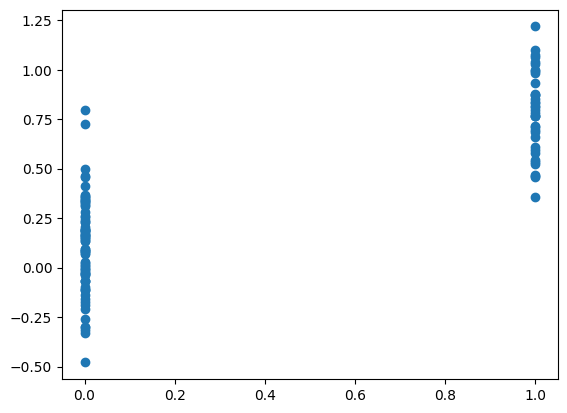

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Text(0.5, 1.0, 'X_train After Scaling')

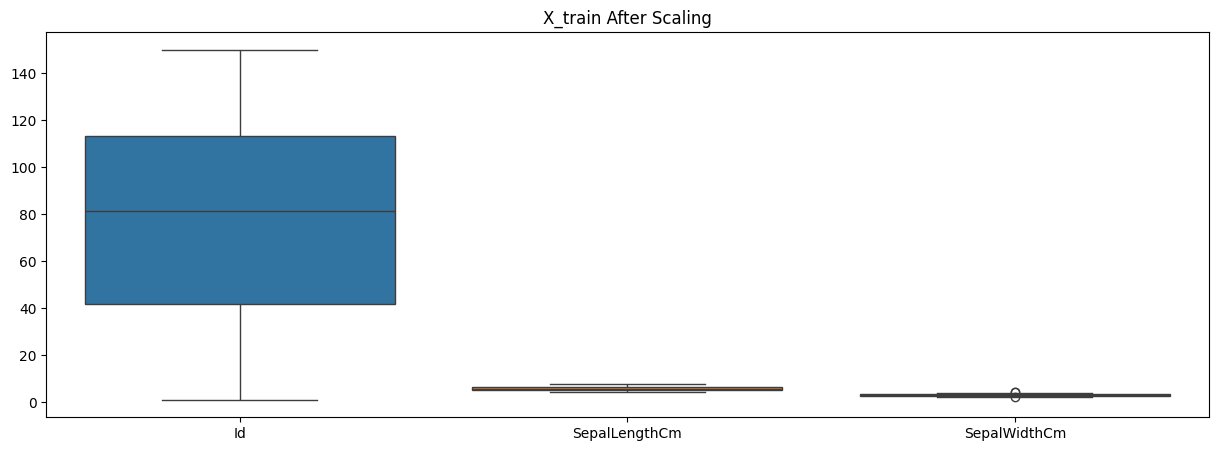

In [47]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=X_train)
plt.title('X_train After Scaling')

### lasso regression

Mean absolute error 0.4458020050125315
R2 Score -0.015879077812954574


<function matplotlib.pyplot.show(close=None, block=None)>

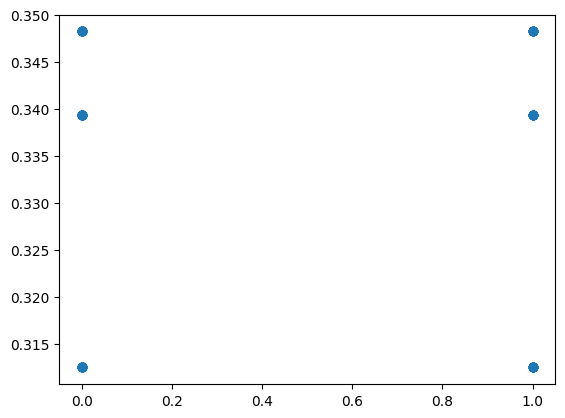

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show

### cross validation lasso

In [49]:
from sklearn.linear_model import MultiTaskLassoCV
lassocv=MultiTaskLassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

MultiTaskLassoCV(cv=5)

Mean absolute error 0.21958329176305222
R2 Score 0.6505259190925278


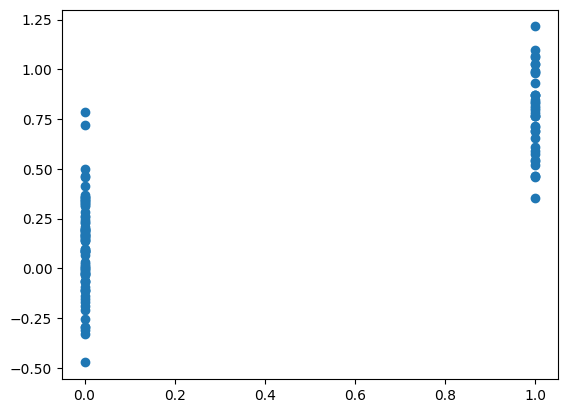

In [50]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.show()

## Ridge Regression Model

In [51]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean absolute error 0.21994958968524722
R2 Score 0.6498978609300762


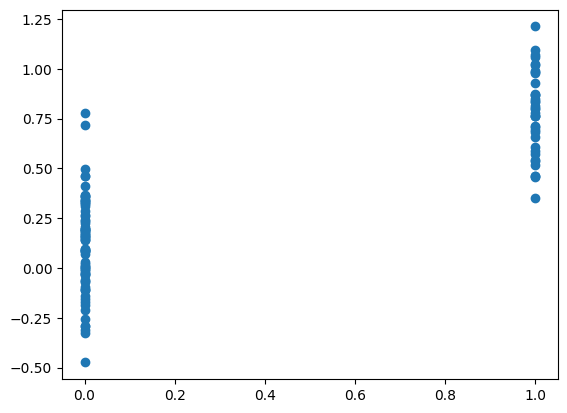

In [52]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

## cross validation ridgecv

Mean absolute error 0.21994958968524722
R2 Score 0.6498978609300762


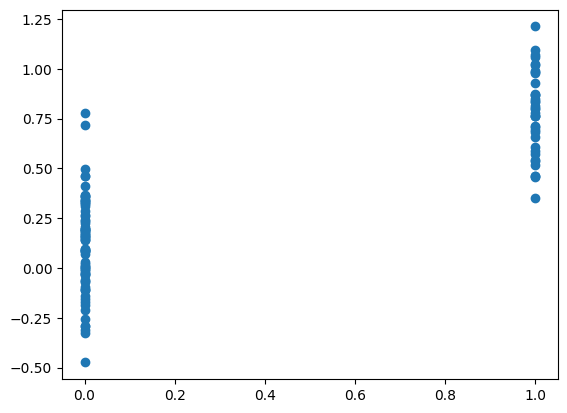

In [53]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.show()

## Elasticnet Regression

In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean absolute error 0.4458020050125315
R2 Score -0.015879077812954574


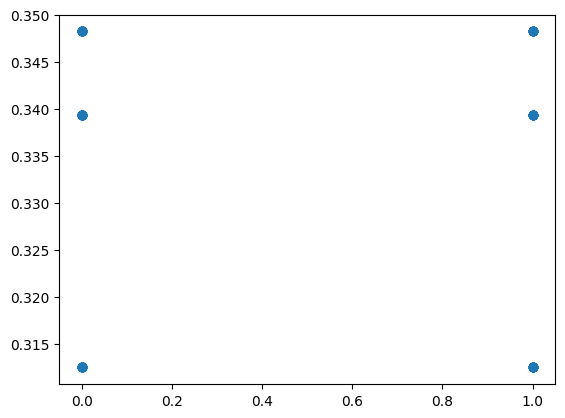

In [55]:
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

## Cross-validation for Elasticnet Regression

In [56]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.show()

ValueError: For multi-task outputs, use MultiTaskElasticNetCV

Mean absolute error 0.21979165580092078
R2 Score 0.6501294171691709


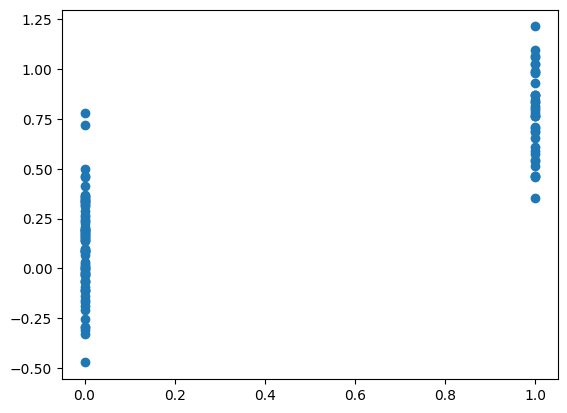

In [57]:
from sklearn.linear_model import MultiTaskElasticNetCV
multielasticcv=MultiTaskElasticNetCV(cv=5)
multielasticcv.fit(X_train_scaled,y_train)
y_pred=multielasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.show()

## exporting to pickle file

In [58]:
import pickle
from flask import Flask,request,jsonify,render_template
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

application = Flask(__name__)
app=application

In [59]:
import pickle
pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [60]:
model_ridge=pickle.load(open('ridge.pkl','rb'))
model_scaler=pickle.load(open('scaler.pkl','rb'))

In [61]:
model_ridge.predict(X_test)

D:\Users\swaroop\anaconda3\envs\swaroopEnv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([[-13.61346459, -14.80293828,  29.41640287],
       [ -3.41234441,  -3.83882558,   8.25117   ],
       [-22.06988292, -23.76784313,  46.83772605],
       [-14.47917165, -15.87588177,  31.35505342],
       [-14.28184148, -15.31712684,  30.59896832],
       [ -5.7839726 ,  -6.4403514 ,  13.224324  ],
       [-11.87802111, -13.05410736,  25.93212847],
       [-25.9829465 , -28.76522011,  55.74816661],
       [-12.84474005, -13.58301082,  27.42775088],
       [-15.20436623, -16.66960021,  32.87396643],
       [-20.29161706, -22.47486187,  43.76647893],
       [ -2.32110132,  -2.50162975,   5.82273106],
       [ -6.68581511,  -7.48383715,  15.16965226],
       [ -1.77786977,  -1.89900696,   4.67687673],
       [ -3.48457228,  -4.13296241,   8.61753469],
       [-10.48183514, -11.42248386,  22.904319  ],
       [-19.24660452, -21.18148689,  41.42809141],
       [-12.85877842, -13.96533802,  27.82411644],
       [-10.28977702, -11.1581096 ,  22.44788662],
       [-24.32508903, -26.89880